<a href="https://colab.research.google.com/github/saishree2004/Machine-learning/blob/main/ML2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading California housing dataset...
Dataset loaded successfully.
Features shape: (20640, 8)
Target shape: (20640,)

Preview of the data:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  

Splitting data into training and testing sets...
Split completed.
Training features shape: (16512, 8)
Testing features shape: (4128, 8)

Training Linear Regression model...
Model training complete.

Evaluating the model...
Mean Squared Error: 0.5559
R² Score: 0.5758

Predicting price for a custom house input...


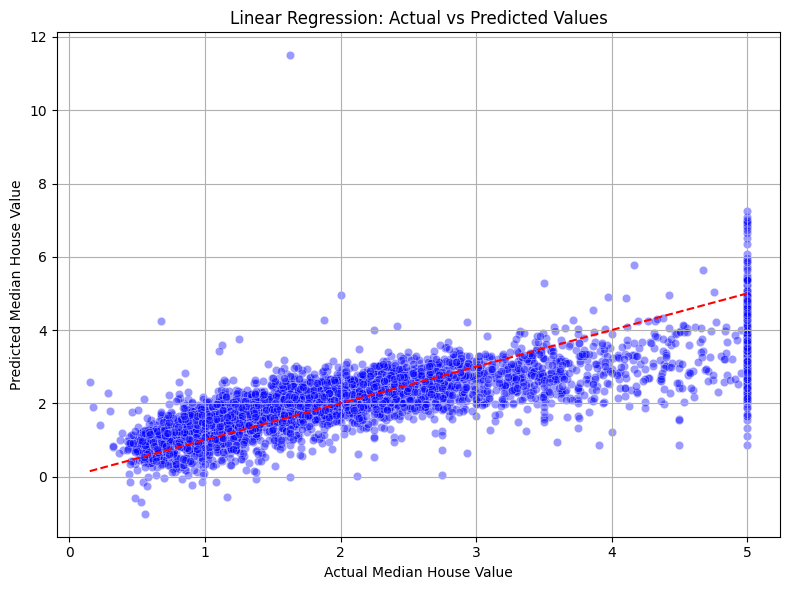

Execution complete.


In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import modules from sklearn
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Load the California housing dataset
print("Loading California housing dataset...")
housing_data = fetch_california_housing()

# Convert to pandas DataFrame
X = pd.DataFrame(housing_data.data, columns=housing_data.feature_names)
y = pd.Series(housing_data.target, name="MedHouseVal")  # Median house value (in $100,000s)

print("Dataset loaded successfully.")
print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Preview the dataset
print("\nPreview of the data:")
print(X.head())

# Step 2: Split the data into training and testing sets
print("\nSplitting data into training and testing sets...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Split completed.")
print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")

# Step 3: Initialize and train the Linear Regression model
print("\nTraining Linear Regression model...")
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
print("Model training complete.")

# Step 4: Evaluate the model on the test data
print("\nEvaluating the model...")
y_pred = lr_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

# Step 5: Predict price for a custom example house
print("\nPredicting price for a custom house input...")

# Example house data (based on average or realistic values)
example_house = pd.DataFrame([{
    'MedInc': 5.0,       # Median income
    'HouseAge': 30.0,    # Median house age
    'AveRooms': 6.0,     # Average rooms
    'AveBedrms': 1.0,    # Average bedrooms
    'Population': 300.0, # Population
    'AveOccup': 3.0,     # Average occupancy
    'Latitude': 36.0,    # Latitude
    'Longitude': -120.0  # Longitude
}])

# Make the prediction
predicted_price = lr_model.predict(example_house)[0]
price_in_dollars = predicted_price * 100000  # Convert to dollars

print(f"Predicted median house value: ${price_in_dollars:,.2f}")

# Step 6: Display model coefficients
print("\nModel coefficients (impact of each feature):")
for feature, coef in zip(X.columns, lr_model.coef_):
    print(f"{feature:12}: {coef:.4f}")

# Step 7: Plot actual vs predicted house prices
print("\nPlotting actual vs predicted house prices...")
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.4, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Ideal fit line
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Linear Regression: Actual vs Predicted Values")
plt.grid(True)
plt.tight_layout()
plt.show()

print("Execution complete.")
